In [1]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Abrimos el fits de las estrellas

star_1b = fits.open('Star1_B.fits')[0]

star_1v = fits.open('Star1_V.fits')[0]

star_2b = fits.open('Star2_B.fits')[0]

star_2v = fits.open('Star2_V.fits')[0]

#data y header

data = star_1b.data
header = star_1b.header

header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Cortes, G. Guerrero, Martinez' / SBIGFITSEXT The name of the observer
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{28b84b6e-08ea-4b

In [3]:
#Threshold, para cada estrella

threshold_1b = detect_threshold(star_1b.data, nsigma = 5)
threshold_1v = detect_threshold(star_1v.data, nsigma = 5)
threshold_2b = detect_threshold(star_2b.data, nsigma = 5)
threshold_2v = detect_threshold(star_2v.data, nsigma = 5)

#Detectamos fuentes

sour_1b = detect_sources(star_1b.data, threshold_1b, npixels=50)
sour_1v = detect_sources(star_1v.data, threshold_1v, npixels=50)
sour_2b = detect_sources(star_2b.data, threshold_2b, npixels=50)
sour_2v = detect_sources(star_1v.data, threshold_2v, npixels=50)

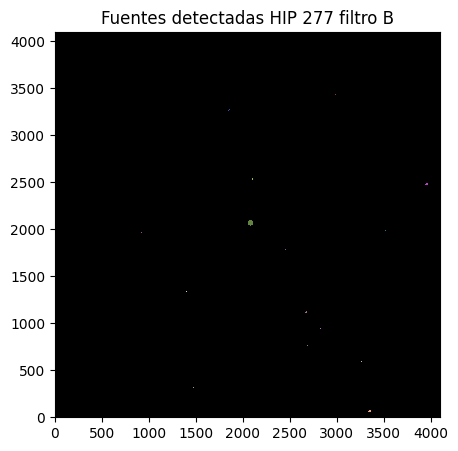

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 17
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


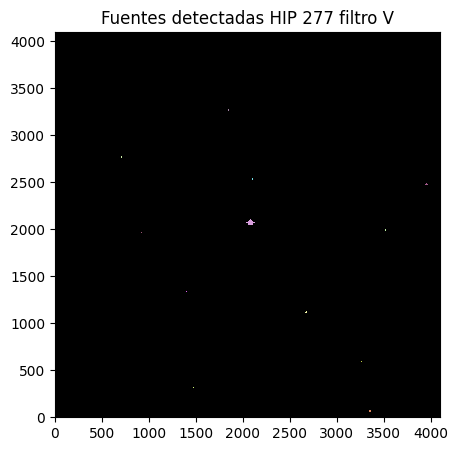

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 12
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12]


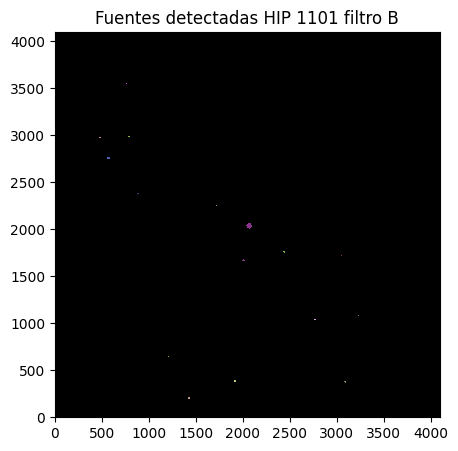

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 18
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


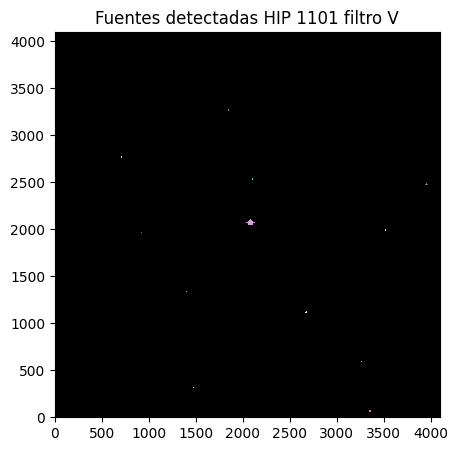

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 12
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [4]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sour_1b = sour_1b.make_cmap(seed=123)
cmap_sour_1v = sour_1v.make_cmap(seed=123)
cmap_sour_2b = sour_2b.make_cmap(seed=123)
cmap_sour_2v = sour_2v.make_cmap(seed=123)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_1b, origin='lower', cmap=cmap_sour_1b, interpolation='nearest')
plt.title('Fuentes detectadas HIP 277 filtro B')
plt.show()
print(sour_1b)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_1v, origin='lower', cmap=cmap_sour_1v, interpolation='nearest')
plt.title('Fuentes detectadas HIP 277 filtro V')
plt.show()
print(sour_1v)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_2b, origin='lower', cmap=cmap_sour_2b, interpolation='nearest')
plt.title('Fuentes detectadas HIP 1101 filtro B')
plt.show()
print(sour_2b)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_2v, origin='lower', cmap=cmap_sour_2v, interpolation='nearest')
plt.title('Fuentes detectadas HIP 1101 filtro V')
plt.show()
print(sour_2v)

In [5]:
#Catalogo

cat_1b = SourceCatalog(star_1b.data, sour_1b)
cat_1v = SourceCatalog(star_1v.data, sour_1v)
cat_2b = SourceCatalog(star_2b.data, sour_2b)
cat_2v = SourceCatalog(star_2v.data, sour_2v)


#Lo pasamos a tabla y lo mostramos
tbl_1b = cat_1b.to_table()
tbl_1v = cat_1v.to_table()
tbl_2b = cat_2b.to_table()
tbl_2v = cat_2v.to_table()

tabla_1b = tbl_1b['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_1v = tbl_1v['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_2b = tbl_2b['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_2v = tbl_2v['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']

#obtenemos flujo real

tabla_1b['segment_flux'] = tabla_1b['segment_flux']/header['EXPTIME']
tabla_1v['segment_flux'] = tabla_1v['segment_flux']/header['EXPTIME']
tabla_2b['segment_flux'] = tabla_2b['segment_flux']/header['EXPTIME']
tabla_2v['segment_flux'] = tabla_2v['segment_flux']/header['EXPTIME']

print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1 3346.3932634719235  62.99547671551781  588.0   4345.30855922699
    2 1476.9860143170786  317.3253295626773  194.0  335.7464455604553
    3   3261.91178272534  589.9878815962285   84.0  97.89154062271118
    4  2687.464712581747  761.1247597239486   53.0 135.50719013214112
    5  2825.844460207109  943.9530126289685   62.0  71.07531385421753
    6 2672.7151743632544 1115.7807151889929  335.0 1333.4648649215699
    7 1395.9435061948066  1335.417465975142  113.0 151.46675424575807
    8 2461.2877118801307 1785.1371751570246   55.0 173.33911209106446
    9  920.1664910447616 1961.1585008604404  227.0  553.3893766403198
   10 3518.1696207398813 1987.8595555520924  170.0  282.1093273162842
   11  2079.490044659177 2066.4274761007973 2456.0  88747.55062408447
   12  3952.72296121

In [6]:
#Buscamos la fuente que es la estrella (mayor área)
star_1b_index = np.argmax(tabla_1b['area'])
star_1v_index = np.argmax(tabla_1v['area'])
star_2b_index = np.argmax(tabla_2b['area'])
star_2v_index = np.argmax(tabla_2v['area'])

#Obtenemos flujo
flux_star_1b = tabla_1b['segment_flux'][star_1b_index]
flux_star_1v = tabla_1v['segment_flux'][star_1v_index]
flux_star_2b = tabla_2b['segment_flux'][star_2b_index]
flux_star_2v = tabla_2v['segment_flux'][star_2v_index]

#Magnitud media
mag_1b = -2.5 * np.log(flux_star_1b)
mag_1v = -2.5 * np.log(flux_star_1v)
mag_2b = -2.5 * np.log(flux_star_2b)
mag_2v = -2.5 * np.log(flux_star_2v)

#Zeropoint (depende del filtro y la estrella)
zp_1b =  7.346 - mag_1b
zp_1v =  7.004 - mag_1v
zp_2b =  7.184 - mag_2b
zp_2v =  6.985 - mag_2v

zp_mean_b = (zp_1b + zp_2b)/2
zp_mean_v = (zp_1v + zp_2v)/2

print(zp_mean_b,zp_mean_v)


35.38463889137677 33.62005757346041


In [7]:
#Magnitud calibrada
tabla_1b['magnitude'] = zp_mean_b - 2.5 * np.log(tabla_1b['segment_flux'])
tabla_1v['magnitude'] = zp_mean_v - 2.5 * np.log(tabla_1v['segment_flux'])
tabla_2b['magnitude'] = zp_mean_b - 2.5 * np.log(tabla_2b['segment_flux'])
tabla_2v['magnitude'] = zp_mean_v - 2.5 * np.log(tabla_2v['segment_flux'])

print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)


label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ ------------------
    1 3346.3932634719235 ...   4345.30855922699 14.442508766477072
    2 1476.9860143170786 ...  335.7464455604553  20.84374826942357
    3   3261.91178272534 ...  97.89154062271118 23.924988547739645
    4  2687.464712581747 ... 135.50719013214112 23.112077134832354
    5  2825.844460207109 ...  71.07531385421753  24.72528870801513
    6 2672.7151743632544 ... 1333.4648649215699 17.395798903227682
    7 1395.9435061948066 ... 151.46675424575807  22.83372349901253
    8 2461.2877118801307 ... 173.33911209106446  22.49651423803041
    9  920.1664910447616 ...  553.3893766403198 19.594484214780245
   10 3518.1696207398813 ...  282.1093273162842  21.27890218806117
   11  2079.490044659177 ...  88747.55062408447 6.9007611204893955
   12  3952.722961215588 ...  2967.351338005066 15.39607632008

C:\Users\gonza\AppData\Local\Temp\ipykernel_17140\194538907.py:5: RuntimeWarning: invalid value encountered in log
  tabla_2v['magnitude'] = zp_mean_v - 2.5 * np.log(tabla_2v['segment_flux'])
